In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import google.colab.drive as drive
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    W

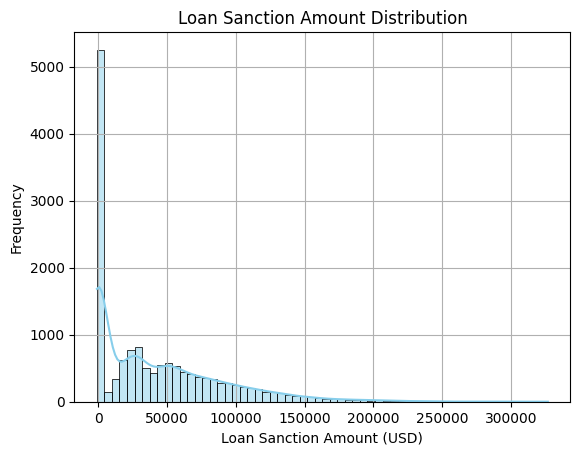

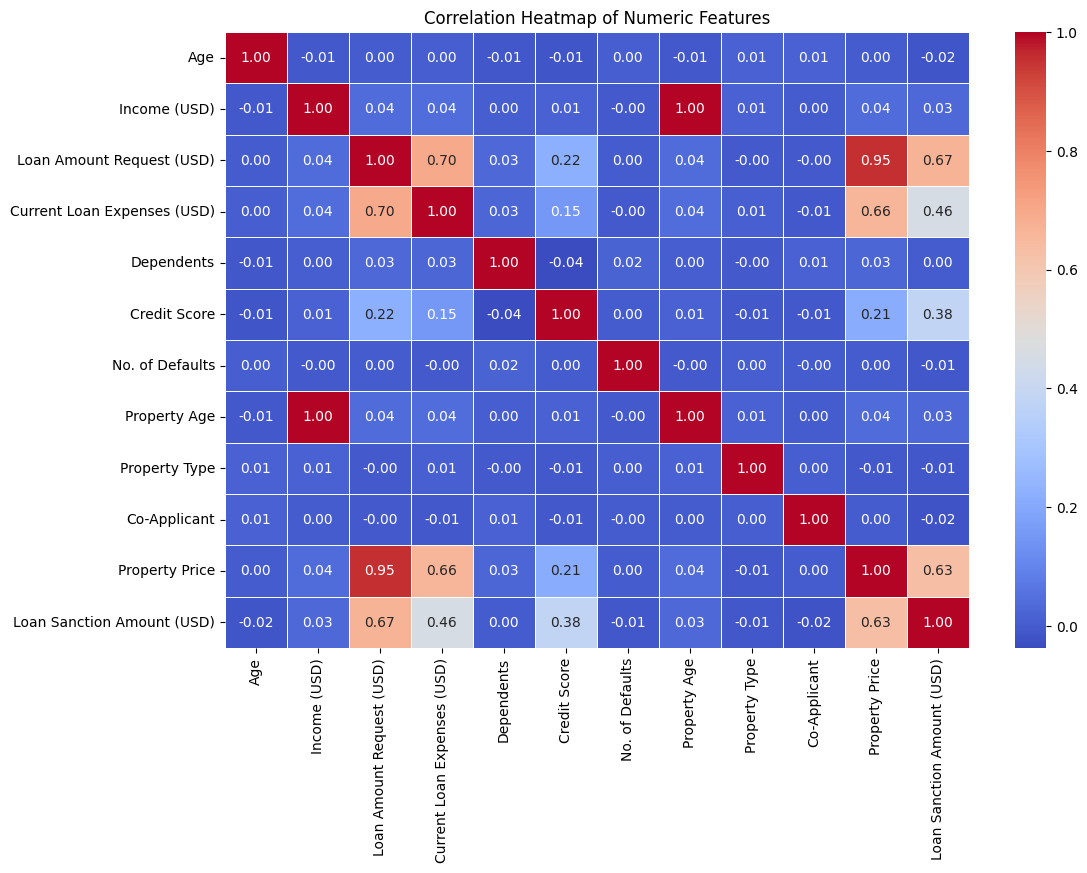

In [ ]:
# 1. Load Dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML LAB SEM 5/train.csv')
print(df.head())

## Drop non-informative identifiers
df.drop(columns=["Customer ID", "Name", "Property ID"], inplace=True)

# Handle missing values (optional: use better imputation)
df.dropna(inplace=True)

# Define target variable
target = "Loan Sanction Amount (USD)"
X = df.drop(columns=[target])
y = df[target]

# Encode categorical variables
categorical_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. EDA
# a. Loan Amount Distribution Plot
sns.histplot(df["Loan Sanction Amount (USD)"], kde=True, color="skyblue")
plt.title("Loan Sanction Amount Distribution")
plt.xlabel("Loan Sanction Amount (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# b. Correlation Heatmap (only for numeric columns)
numeric_df = df.select_dtypes(include=["number"])  # selects only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
# 4. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}, Adj R2: {adj_r2}")

MAE: 25323.793500422737, MSE: 1195267145.5071688, RMSE: 34572.63579056663, R2: 0.47512320259332885, Adj R2: 0.47375943210040017


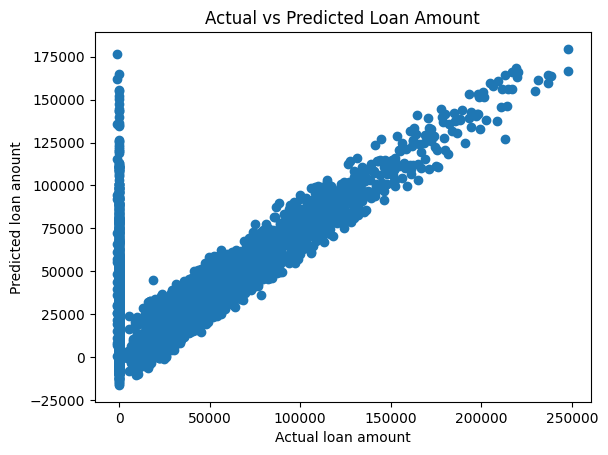

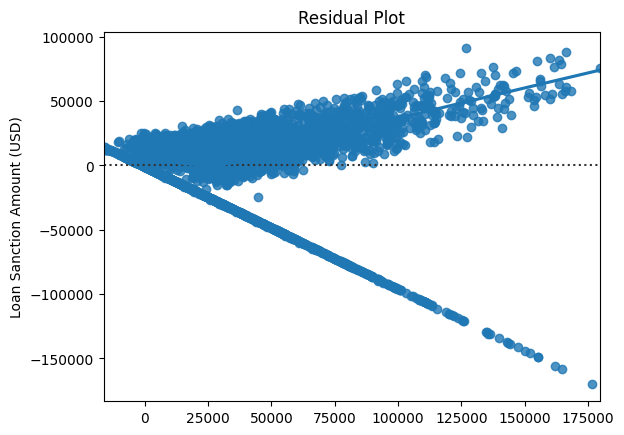

/tmp/ipython-input-6-2134375661.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature", palette="viridis")


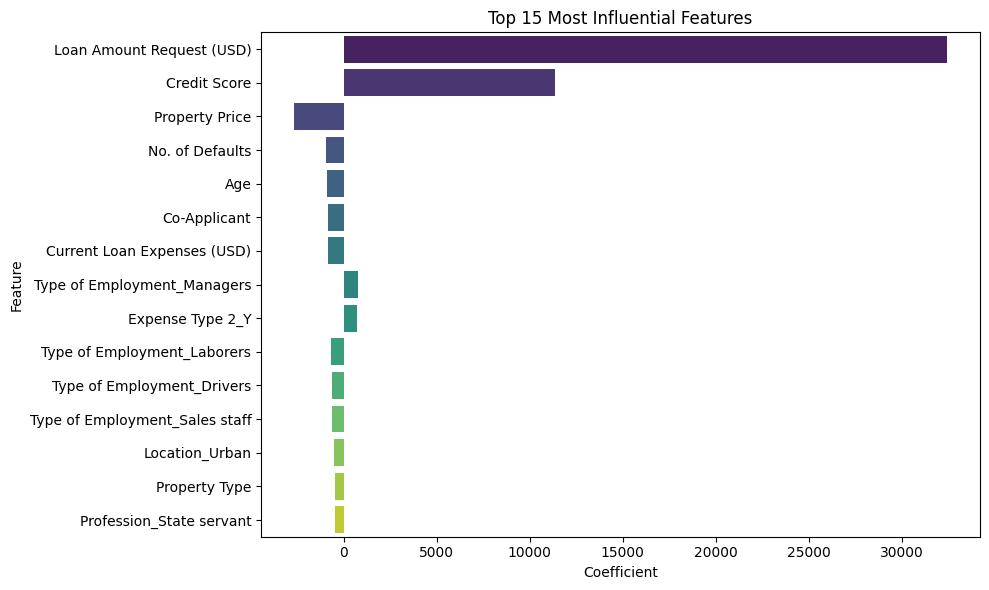

In [ ]:
# 7. Visualizations
plt.scatter(y_test, y_pred)
plt.xlabel("Actual loan amount")
plt.ylabel("Predicted loan anount")
plt.title("Actual vs Predicted Loan Amount")
plt.show()

residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.title("Residual Plot")
plt.show()

# Feature importance (coefficients)
feature_names = X.columns
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature", palette="viridis")
plt.title("Top 15 Most Influential Features")
plt.tight_layout()
plt.show()